<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-необходимых-библиотек" data-toc-modified-id="Загрузка-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка необходимых библиотек</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Загрузка необходимых библиотек

In [190]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

### Знакомство с данными

Признаки:

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента

In [191]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.head(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


В названиях столбцов нарушен стиль написания - строчные буквы сочетаются с прописными. Необходимо привести названия полей к нижнему регистру и разделить слова символом нижнего подчеркивания.

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [193]:
data.pivot_table(index='Geography', values='RowNumber', aggfunc='count')

,RowNumber
Geography,
France,5014
Germany,2509
Spain,2477


In [194]:
data.pivot_table(index='Gender', values='RowNumber', aggfunc='count')

,RowNumber
Gender,
Female,4543
Male,5457


Столбцы Geography и Gender, география и пол, имеют тип object и являются категориальными переменными. В последующем для оперирования ими, необходимо будет их преобразовать.

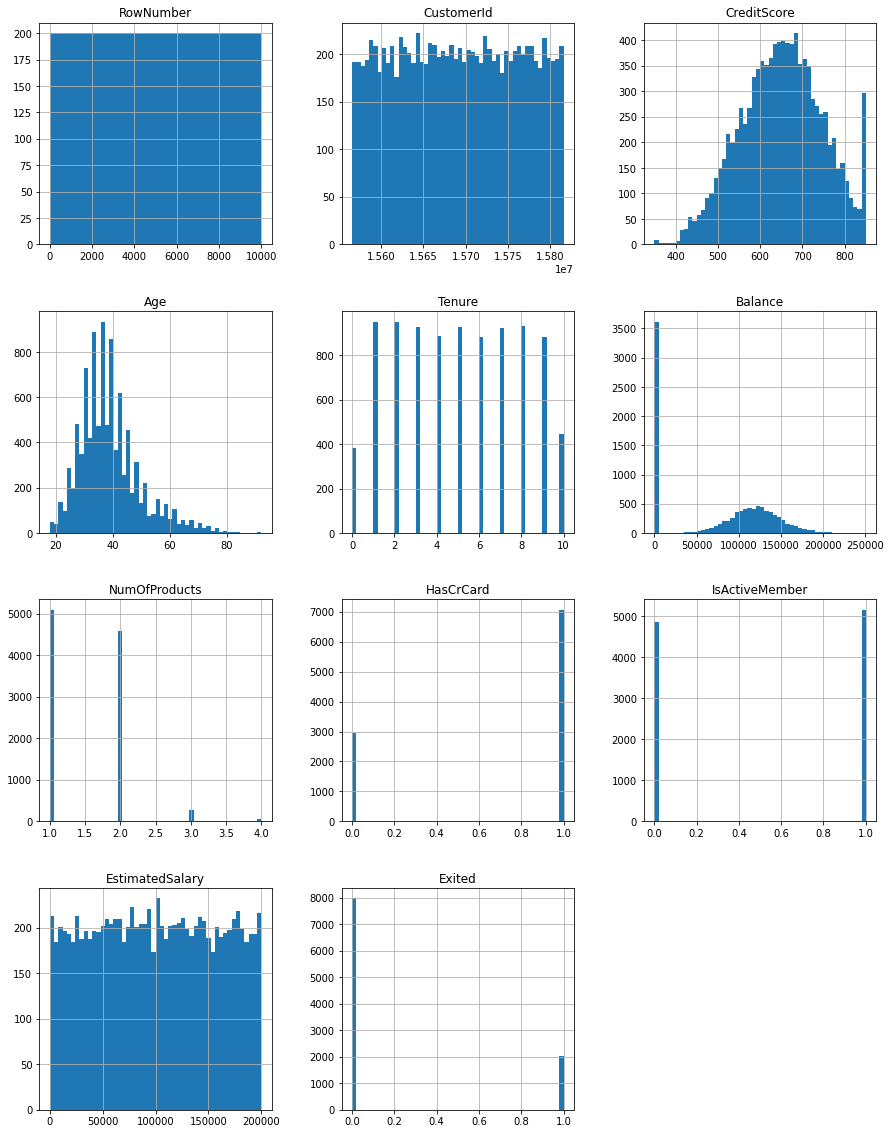

In [195]:
data.hist(bins=50, figsize=(15, 20));

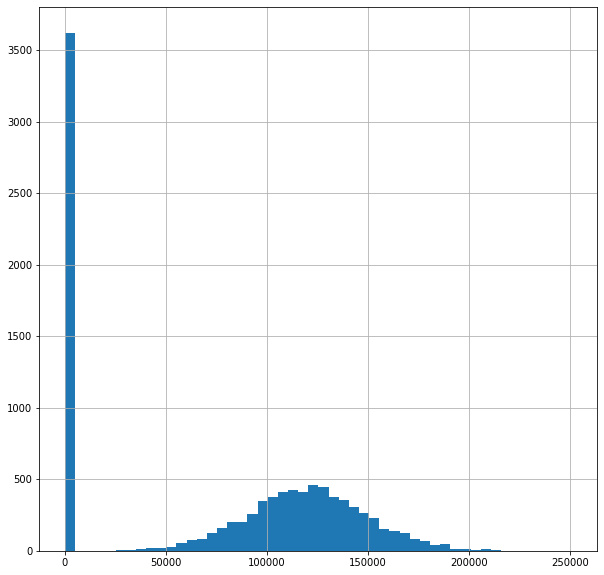

In [196]:
data['Balance'].hist(bins=50, figsize=(10,10));

По гистограммам видны выбросы в неоторых столбцах:
    
    В столбце CreditScore с максимальным кредитным рейтингом в 850. Возможно это связано с тем, что значение 850 - это "потолок" рейтинга. И если продолжить нормальное распределение на графике, то сумма клиентов после значения 850 как раз и равнялось бы около 300.
    
    И в столбце Balance, у более чем трети пользователей нулевое значение. Возможно эти клиенты уже пользуются услугами других банков, и соответственно финансовые потоки у них протекают там, либо они просто нищие и них вообще ничего нет за душой(что маловероятно). 
    
Остальные графики внимания пока не привлекают.

In [197]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [198]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В столбце Tenure(сколько лет человек является клиентом банка) имеются пропуски. На мой взгляд, это важный признак для обучения модели, но логически заменить его нечем, поэтому необходимо будет удалить строки с пропуском. 

Итог знакомства с данными:

    В названиях столбцов нарушен стиль написания - строчные буквы сочетаются с прописными. Необходимо привести названия полей к нижнему регистру и разделить слова символом нижнего подчеркивания.
    
    Столбцы Geography и Gender, география и пол, имеют тип object и являются категориальными переменными. В последующем для оперирования ими, необходимо будет их преобразовать.
    
    В столбце Tenure(сколько лет человек является клиентом банка) имеются пропуски. На мой взгляд, это важный признак для обучения модели, но логически заменить его нечем, поэтому необходимо будет удалить строки с пропуском.
    
    Тип столбцца Tenure (сколько лет человек является клиентом банка) необходимо изменить на int64, т.к. переменная принимает только целочисленные значения.

    Столбцы RowNumber (индекс строки в данных), CustomerId (уникальный идентификатор клиента), Surname (фамилия) не будут использоваться в исследовании, их можно удалить.

    Столбцы CreditScore (кредитный рейтинг), Age (возраст), Tenure (сколько лет человек является клиентом банка), Balance (баланс на счёте), NumOfProducts (количество продуктов банка, используемых клиентом), EstimatedSalary (предполагаемая зарплата) - это количественные признаки, которые имеют разный масштаб. Для проведения исследования их необходимо масштабировать (стандартизировать).
    

### Предобработка данных

In [199]:
data.duplicated().sum() # Потск явных дубликатов

0

Удалим пропуски

In [200]:
data = data.dropna()
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Удалим лишние столбцы и приведем оставшиеся в корректный вид

In [201]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) 

data.set_axis(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
             'is_active_member', 'estimated_salary', 'exited'], axis='columns', inplace=True)

Изменим тип столбца 'tenure'

In [202]:
data['tenure'] = data['tenure'].astype('Int64')

Посмотрим, что получилось

In [203]:
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Для обучения моделей категориальные признаки необходимо преобразовать в численные. Для этого будем использовать техники прямого кодирования (ОНЕ), которая подходит для преобразования признаков в логистической регресии, а также использовать технику порядкового кодирования, которая подходит для решающего дерева и случайного леса. Преобразуем данные с помощью двух техник и создадим соответственно два новых датасета - data_ohe и data_ordinal.

In [204]:
data_ohe = pd.get_dummies(data, columns=['geography', 'gender'], drop_first=True)
data_ohe.head(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [205]:

encoder = OrdinalEncoder()
data_ordinal = data
encoder.fit(data_ordinal[['geography', 'gender']])
data_ordinal[['geography', 'gender']] = encoder.transform(data_ordinal[['geography', 'gender']])
data_ordinal.head(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
5,645,2.0,1.0,44,8,113755.78,2,1,0,149756.71,1
6,822,0.0,1.0,50,7,0.00,2,1,1,10062.80,0
7,376,1.0,0.0,29,4,115046.74,4,1,0,119346.88,1
8,501,0.0,1.0,44,4,142051.07,2,0,1,74940.50,0
9,684,0.0,1.0,27,2,134603.88,1,1,1,71725.73,0


Исправил

Итог предобработки данных:

    Проверено на наличие явных дубликатов
    
    Удалены пропуски в датасете.

    Удалены столбцы RowNumber, CustomerId, Surname. Названия столбцов приведены к правильному стилю написания.
    
    Категориальные признаки в датасете преобразованы в численные с помощью двух техник прямого кодирования (OHE) и порядкового кодирования (OrdinalEncoder).

## Исследование задачи

Исследовать будем с помощью трех моделей: дерево решений, случайный лес и логистическая регрессия.

Но с начала посмотрим на баланс классов искомого признака. 

### Баланс классов

0    7237
1    1854
Name: exited, dtype: int64

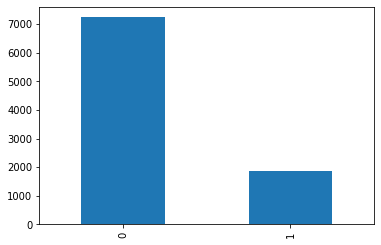

In [206]:
f, ax = plt.subplots(1, 1)
data['exited'].value_counts().plot(kind='bar', label='valid');
data['exited'].value_counts()

Соотношение классов практически 4:1. Это говорит о том, что они не сбалансированы. В следующем пункте постараемся избавиться от дисбаланса классов.

### Решающее дерево

Для проверки моделей на правильность предсказаний нужно разбить данные на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Данные будут разбиваться в соотношении 3:1:1.

In [207]:

features_ord = data_ordinal.drop(['exited'], axis=1)
target_ord = data_ordinal['exited']

Разделим данные на обучающую, тестовую и валидационную. Соотношение будет 3:1:1

In [208]:
features_train_ord, features_test_ord, target_train_ord, target_test_ord  = train_test_split(
    features_ord, 
    target_ord, 
    train_size=0.6, random_state=12345)
features_test_ord, features_valid_ord, target_test_ord, target_valid_ord = train_test_split(
    features_test_ord, 
    target_test_ord, 
    test_size=0.5, random_state=12345)

Посмотрим, что получилось

In [209]:
display('количество строк в features_train_ord', features_train_ord.shape[0])
display('количество строк в target_train_ord', target_train_ord.shape[0])
display('количество строк в features_test_ord', features_test_ord.shape[0])
display('количество строк в target_test_ord', target_test_ord.shape[0])
display('количество строк в features_valid_ord', features_valid_ord.shape[0])
display('количество строк в target_valid_ord', target_valid_ord.shape[0])

'количество строк в features_train_ord'

5454

'количество строк в target_train_ord'

5454

'количество строк в features_test_ord'

1818

'количество строк в target_test_ord'

1818

'количество строк в features_valid_ord'

1819

'количество строк в target_valid_ord'

1819

Проверим "состав" искомого признака обучающей модели, чтоб не было перекосов.

In [210]:
target_train_ord.value_counts()

0    4328
1    1126
Name: exited, dtype: int64

Сделаем масштабирование признаков

In [211]:
numeric=['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train_ord[numeric]) 
features_train_ord[numeric] = scaler.transform(features_train_ord[numeric])
features_valid_ord[numeric] = scaler.transform(features_valid_ord[numeric])
features_test_ord[numeric] = scaler.transform(features_test_ord[numeric])


/tmp/ipykernel_31/2367850413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_ord[numeric] = scaler.transform(features_train_ord[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [212]:
    model = DecisionTreeClassifier(random_state=12345, max_depth=5)
    model.fit(features_train_ord, target_train_ord)
    predictions = model.predict(features_valid_ord)
    print(f1_score(target_valid_ord, predictions))

0.5342960288808665


In [213]:
best_model = None
best_result = 0
best_predictions = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_ord, target_train_ord)
    predictions = model.predict(features_valid_ord)
    result = f1_score(target_valid_ord, predictions)
    if result > best_result:
        best_model = model
        best_result = result
        best_predictions = predictions
    
print('F1-мера =', best_result,'с глубиной:', best_model.max_depth)
print("Accuracy наилучшей модели:", model.score(features_valid_ord, target_valid_ord))
print('Полнота:', recall_score(target_valid_ord, predictions))
print('Точность:', precision_score(target_valid_ord, predictions))

F1-мера = 0.5342960288808665 с глубиной: 5
Accuracy наилучшей модели: 0.8411214953271028
Полнота: 0.452991452991453
Точность: 0.62109375


Исправлено

### Случайный лес

Сперва найдем наилучшую глубину случайного леса, а потом и количество деревьев.

In [214]:
best_model = None
best_result = 0
for depth in range(1, 16, 1):
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=12345)
    model.fit(features_train_ord, target_train_ord)
    predictions = model.predict(features_valid_ord)
    result = f1_score(target_valid_ord, predictions) 
    if result > best_result:
        best_model = model 
        best_result = result 
        a = best_model.max_depth
        
print("F1-мера =", best_result)
print("Глубина:",  a)

F1-мера = 0.5683060109289617
Глубина: 13


Теперь количество деревьев

In [215]:
best_model = None
best_result = 0
best_predictions = 0
for est in range(1, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators= est, max_depth=a) 
    model.fit(features_train_ord, target_train_ord) 
    predictions = model.predict(features_valid_ord)
    result = f1_score(target_valid_ord, predictions)
    if result > best_result:
        best_model = model 
        best_result = result 
        best_predictions = predictions
        
print('F1-мера наилучшей модели =', best_result,'с количеством деревьев', best_model.n_estimators)        
print("Accuracy:", model.score(features_valid_ord, target_valid_ord))
print('Полнота:', recall_score(target_valid_ord, best_predictions))
print('Точность:', precision_score(target_valid_ord, best_predictions))

F1-мера наилучшей модели = 0.572992700729927 с количеством деревьев 78
Accuracy: 0.8702583837273227
Полнота: 0.4472934472934473
Точность: 0.7969543147208121


### Логистическая регрессия

Для логистической регрессии будем использовать подготовленный ранее датасет data_ohe. 

Так же как и в предыдущих моделях разделим его на обучающие признаки и целевой. Затем на обучающие выборки, тестовый и валидационный

In [216]:
features_ohe = data_ohe.drop(['exited'], axis=1)
target_ohe = data_ohe['exited']

features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe  = train_test_split(
    features_ohe, 
    target_ohe, 
    train_size=0.6, random_state=12345)
features_test_ohe, features_valid_ohe, target_test_ohe, target_valid_ohe = train_test_split(
    features_test_ohe, 
    target_test_ohe, 
    test_size=0.5, random_state=12345)

Посмотрим, что получилось

In [217]:
display('количество строк в features_train_ohe', features_train_ohe.shape[0])
display('количество строк в target_train_ohe', target_train_ohe.shape[0])
display('количество строк в features_test_ohe', features_test_ohe.shape[0])
display('количество строк в target_test_ohe', target_test_ohe.shape[0])
display('количество строк в features_valid_ohe', features_valid_ohe.shape[0])
display('количество строк в target_valid_ohe', target_valid_ohe.shape[0])
print(target_train_ord.value_counts())

'количество строк в features_train_ohe'

5454

'количество строк в target_train_ohe'

5454

'количество строк в features_test_ohe'

1818

'количество строк в target_test_ohe'

1818

'количество строк в features_valid_ohe'

1819

'количество строк в target_valid_ohe'

1819

0    4328
1    1126
Name: exited, dtype: int64


In [218]:
numeric=['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric]) 
features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_valid_ohe[numeric] = scaler.transform(features_valid_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

/tmp/ipykernel_31/658020059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [219]:
model = LogisticRegression(solver='lbfgs', random_state=12345)
model.fit(features_train_ohe, target_train_ohe) 
predictions = model.predict(features_valid_ohe)
result = model.score(features_valid_ohe, target_valid_ohe) 

print('F1-мера =', f1_score(target_valid_ohe, predictions))
print("Accuracy =", result)
print('Полнота:', recall_score(target_valid_ohe, best_predictions))
print('Точность:', precision_score(target_valid_ohe, best_predictions))

F1-мера = 0.32119914346895073
Accuracy = 0.8257284222100055
Полнота: 0.4472934472934473
Точность: 0.7969543147208121


### Вывод

В ходе исследования задачи был выявлен дисбаланс классов.

Были изучены модели без учёта дисбаланса

Определены гиперпараметры моделей решающего дерева и случайного леса с самым высоким значением Accuracy:

    DecisionTreeClassifier(random_state=12345, max_depth=5)

    RandomForestClassifier(random_state=12345, n_estimators= 78, max_depth=13)

Рассчитаны показатели качества для моделей: Accuracy, F1-мера, Precision, Recall.

Из-за дисбаланса классов прослеживается довольно низкое значение метрики полноты.

Посчитаю ROC на наилучшей модели, случайного леса без учета дисбаланса

In [236]:
model = RandomForestClassifier(random_state=12345, n_estimators= 78, max_depth=13) 
model.fit(features_train_ord, target_train_ord) 
probabilities_valid = model.predict_proba(features_valid_ord)
probabilities_one_valid = probabilities_f[:, 1]

print("ROC случайного леса c учетом дисбаланса :", roc_auc_score(target_valid_ord, probabilities_one_valid))

ROC случайного леса c учетом дисбаланса : 0.84854774602731


Исправлено, проскочил мимо)

## Борьба с дисбалансом

С дисбалансом будем бороться с помощью техник: upsampling, downsampling и указанием аргумента class_weight='balanced'.

Сделаем функции для upsampling и downsampling

In [221]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled



In [222]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

Проверим, какая техника борьбы с дисбалансов наилучший на каждой модели.

### Решающее дерево

Начнем с простого, указав параметр class_weight='balanced'

In [223]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train_ord, target_train_ord)
result = model.score(features_valid_ord, target_valid_ord)
predictions = model.predict(features_valid_ord)
print("Accuracy наилучшей модели:", result)
print('F1-мера =', f1_score(target_valid_ord, predictions))
print('Полнота:', recall_score(target_valid_ord, predictions))
print('Точность:', precision_score(target_valid_ord, predictions))

#Создаю таблицу для удобства просмотра качеств моделей
Model = 'Решающее дерево'
Balanc = 'class_weight'
tablo = [[result, f1_score(target_valid_ord, predictions), recall_score(target_valid_ord, predictions),
          precision_score(target_valid_ord, predictions), Model, Balanc]]
quality = pd.DataFrame(tablo, columns=["Accuracy", "F1-мера", "Полнота", "Точность", "Модель", "Баланс"])

Accuracy наилучшей модели: 0.7894447498625619
F1-мера = 0.5488810365135454
Полнота: 0.6638176638176638
Точность: 0.4678714859437751


upsampling так как дисбаланс около 1:4, то увеличивать будем в 4 раза.

In [224]:
features_upsampled, target_upsampled = upsample(features_train_ord, target_train_ord, 4)

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_upsampled, target_upsampled)
result = model.score(features_upsampled, target_upsampled)
predictions = model.predict(features_valid_ord)

print("Accuracy наилучшей модели:", result)
print('F1-мера =', f1_score(target_valid_ord, predictions))
print('Полнота:', recall_score(target_valid_ord, predictions))
print('Точность:', precision_score(target_valid_ord, predictions))

Model = 'Решающее дерево'
Balanc = 'upsampling'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ord, predictions), 
             "Полнота":recall_score(target_valid_ord, predictions),
          "Точность":precision_score(target_valid_ord, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)

Accuracy наилучшей модели: 0.7622282608695652
F1-мера = 0.5488810365135454
Полнота: 0.6638176638176638
Точность: 0.4678714859437751


downsampling

In [225]:
print(target_train_ord.value_counts())
print('fraction = ', target_train_ord.value_counts()[1]/target_train_ord.value_counts()[0])

0    4328
1    1126
Name: exited, dtype: int64
fraction =  0.2601663585951941


Каюсь, значение fraction перебирал по лучшему показанию F1

In [226]:
features_downsampled, target_downsampled = downsample(features_train_ord, target_train_ord, 0.26)

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_downsampled, target_downsampled)
result = model.score(features_downsampled, target_downsampled)
predictions = model.predict(features_valid_ord)

print("Accuracy наилучшей модели:", result)
print('F1-мера =', f1_score(target_valid_ord, predictions))
print('Полнота:', recall_score(target_valid_ord, predictions))
print('Точность:', precision_score(target_valid_ord, predictions))

Model = 'Решающее дерево'
Balanc = 'downsampling'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ord, predictions), 
             "Полнота":recall_score(target_valid_ord, predictions),
          "Точность":precision_score(target_valid_ord, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)
quality

Accuracy наилучшей модели: 0.7765437583296313
F1-мера = 0.5517241379310345
Полнота: 0.6609686609686609
Точность: 0.47346938775510206


,Accuracy,F1-мера,Полнота,Точность,Модель,Баланс
0,0.789445,0.548881,0.663818,0.467871,Решающее дерево,class_weight
1,0.762228,0.548881,0.663818,0.467871,Решающее дерево,upsampling
2,0.776544,0.551724,0.660969,0.473469,Решающее дерево,downsampling


### Случайный лес

class_weight='balanced'

In [227]:
model = RandomForestClassifier(random_state=12345, n_estimators= 78, max_depth=13, class_weight='balanced') 
model.fit(features_train_ord, target_train_ord)
result = model.score(features_valid_ord, target_valid_ord) 
predictions = model.predict(features_valid_ord)

print("Accuracy наилучшей модели:", result)
print('F1-мера =', f1_score(target_valid_ord, predictions))
print('Полнота:', recall_score(target_valid_ord, predictions))
print('Точность:', precision_score(target_valid_ord, predictions))

Model = 'Случайный лес'
Balanc = 'class_weight'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ord, predictions), 
             "Полнота":recall_score(target_valid_ord, predictions),
          "Точность":precision_score(target_valid_ord, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)

Accuracy наилучшей модели: 0.857064321055525
F1-мера = 0.5765472312703582
Полнота: 0.5042735042735043
Точность: 0.6730038022813688


upsampling

In [228]:


model = RandomForestClassifier(random_state=12345, n_estimators= 81, max_depth=8) 
model.fit(features_upsampled, target_upsampled)
result = model.score(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid_ord)


print("Accuracy наилучшей модели:", result)
print('F1-мера =', f1_score(target_valid_ord, predictions))
print('Полнота:', recall_score(target_valid_ord, predictions))
print('Точность:', precision_score(target_valid_ord, predictions))

Model = 'Случайный лес'
Balanc = 'upsampling'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ord, predictions), 
             "Полнота":recall_score(target_valid_ord, predictions),
          "Точность":precision_score(target_valid_ord, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)

Accuracy наилучшей модели: 0.8481657608695652
F1-мера = 0.5555555555555556
Полнота: 0.698005698005698
Точность: 0.4613935969868173


downsampling

In [229]:


model = RandomForestClassifier(random_state=12345, n_estimators= 81, max_depth=8) 
model.fit(features_downsampled, target_downsampled)
result = model.score(features_downsampled, target_downsampled) 
predictions = model.predict(features_valid_ord)

print("Accuracy наилучшей модели:", result)
print('F1-мера =', f1_score(target_valid_ord, predictions))
print('Полнота:', recall_score(target_valid_ord, predictions))
print('Точность:', precision_score(target_valid_ord, predictions))

Model = 'Случайный лес'
Balanc = 'downsampling'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ord, predictions), 
             "Полнота":recall_score(target_valid_ord, predictions),
          "Точность":precision_score(target_valid_ord, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)

Accuracy наилучшей модели: 0.8756108396268325
F1-мера = 0.5488180883864336
Полнота: 0.7606837606837606
Точность: 0.4292604501607717


### Логистическая регрессия

class_weight='balanced'

In [230]:
model = LogisticRegression(solver='lbfgs', random_state=12345, class_weight='balanced')
model.fit(features_train_ohe, target_train_ohe) 
predictions = model.predict(features_valid_ohe)
result = model.score(features_valid_ohe, target_valid_ohe) 

print("Accuracy =", result)
print('F1-мера =', f1_score(target_valid_ohe, predictions))
print('Полнота:', recall_score(target_valid_ohe, predictions))
print('Точность:', precision_score(target_valid_ohe, predictions))

Model = 'Логистическая регрессия'
Balanc = 'class_weight'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ohe, predictions), 
             "Полнота":recall_score(target_valid_ohe, predictions),
          "Точность":precision_score(target_valid_ohe, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)

Accuracy = 0.7311709730621221
F1-мера = 0.5025432349949135
Полнота: 0.7037037037037037
Точность: 0.39082278481012656


upsampling

In [231]:
features_upsampled, target_upsampled = upsample(features_train_ohe, target_train_ohe, 4)

model = LogisticRegression(solver='lbfgs', random_state=12345)
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid_ohe)
result = model.score(features_upsampled, target_upsampled) 

print("Accuracy =", result)
print('F1-мера =', f1_score(target_valid_ohe, predictions))
print('Полнота:', recall_score(target_valid_ohe, predictions))
print('Точность:', precision_score(target_valid_ohe, predictions))

Model = 'Логистическая регрессия'
Balanc = 'upsampling'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ohe, predictions), 
             "Полнота":recall_score(target_valid_ohe, predictions),
          "Точность":precision_score(target_valid_ohe, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)

Accuracy = 0.7005208333333334
F1-мера = 0.49653808110781406
Полнота: 0.7150997150997151
Точность: 0.3803030303030303


downsampling

In [232]:
features_downsampled, target_downsampled = downsample(features_train_ohe, target_train_ohe, 0.26)

model = LogisticRegression(solver='lbfgs', random_state=12345)
model.fit(features_downsampled, target_downsampled) 
predictions = model.predict(features_valid_ohe)
result = model.score(features_downsampled, target_downsampled) 

print("Accuracy =", result)
print('F1-мера =', f1_score(target_valid_ohe, predictions))
print('Полнота:', recall_score(target_valid_ohe, predictions))
print('Точность:', precision_score(target_valid_ohe, predictions))

Model = 'Логистическая регрессия'
Balanc = 'downsampling'
new_index = {'Accuracy':result, "F1-мера":f1_score(target_valid_ohe, predictions), 
             "Полнота":recall_score(target_valid_ohe, predictions),
          "Точность":precision_score(target_valid_ohe, predictions), 
             "Модель":Model, "Баланс":Balanc}
quality = quality.append(new_index, ignore_index=True)

Accuracy = 0.7027987561083963
F1-мера = 0.492462311557789
Полнота: 0.698005698005698
Точность: 0.3804347826086957


### Вывод

In [233]:
quality.sort_values('F1-мера', ascending=False) # Отсортируем таблицу по убыванию столбца F1-мера

,Accuracy,F1-мера,Полнота,Точность,Модель,Баланс
3,0.857064,0.576547,0.504274,0.673004,Случайный лес,class_weight
4,0.848166,0.555556,0.698006,0.461394,Случайный лес,upsampling
2,0.776544,0.551724,0.660969,0.473469,Решающее дерево,downsampling
0,0.789445,0.548881,0.663818,0.467871,Решающее дерево,class_weight
1,0.762228,0.548881,0.663818,0.467871,Решающее дерево,upsampling
5,0.875611,0.548818,0.760684,0.429260,Случайный лес,downsampling
6,0.731171,0.502543,0.703704,0.390823,Логистическая регрессия,class_weight
7,0.700521,0.496538,0.715100,0.380303,Логистическая регрессия,upsampling
8,0.702799,0.492462,0.698006,0.380435,Логистическая регрессия,downsampling


Применение методов борьбы с дисбалансом привело к увеличению показателя F1-меры, а также к значительному увеличению метрики Полноты, а метрика Точность, наоборот уменьшилась.

Лучший показатель F1 = 0,5765 на валидационной выборке у модели случайного леса с class_weight='balanced': 
    
    RandomForestClassifier(random_state=12345, n_estimators= 78, max_depth=13)

Обучим еще раз модель с лучшими показателями F1-меры и протестируем ее.

ROC случайного леса c учетом дисбаланса

In [235]:
model = RandomForestClassifier(random_state=12345, n_estimators= 78, max_depth=13, class_weight='balanced') 
model.fit(features_train_ord, target_train_ord) 
predictions = model.predict(features_valid_ord)
probabilities_f = model.predict_proba(features_valid_ord)
probabilities_one_f = probabilities_f[:, 1]

print("ROC случайного леса c учетом дисбаланса :", roc_auc_score(target_valid_ord, probabilities_one_f))

ROC случайного леса c учетом дисбаланса : 0.84854774602731


## Тестирование модели

Проверяем выбранную нами модель "Случайного леса" на тестовой выборке, с учетом баланса. А также построим график ROC-кривой

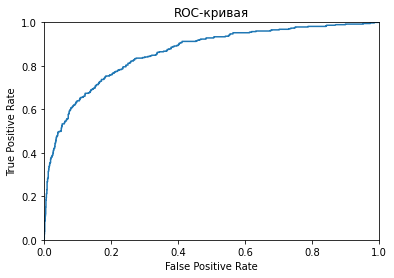

ROC 0.8613326657548821
F1-мера = 0.607361963190184
[0.6810098  0.11350295 0.66518442 ... 0.13325655 0.07871855 0.64888802]
[1 0 1 ... 0 0 1]


In [186]:


model = RandomForestClassifier(random_state=12345, n_estimators= 78, max_depth=13, class_weight='balanced') 
model.fit(features_train_ord, target_train_ord)
prediction_test = model.predict(features_test_ord)
probabilities = model.predict_proba(features_test_ord)
probabilities_one = probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_test_ord, probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

print("ROC", roc_auc_score(target_test_ord, probabilities_one))
print('F1-мера =', f1_score(target_test_ord, prediction_test))

С поставленной задачей справился, результат получился не ниже, чем 0.59. 

## Общий вывод 

В ходе проекта были исследованы исторические данные о поведении клиентов и расторжении договоров с банком.

В ходе исследования задачи был выявлен дисбаланс классов, а также были построены модели для классификации, которые предсказывают уйдёт клиент из банка в ближайшее время или нет. Для этого данные были разбиты на три выборки: обучающую, валидационную и тестовую в соотношении 3:1:1. Были использованы следующие алгоритмы для построения моделей:

Decision Tree (Дерево решений),
Random Forest (Случайный лес) с двумя гиперпараметрами (n_estimators и max_depth),
Logistic Regression (Логическая регрессия)
Для каждой модели рассчитаны показатели качества - Accuracy, F1-мера, Precision, Recall.

Для борьбы с дисбалансом было использовано три техники:

class weight (взвешивание классов)
upsampling (увеличение выборки)
downsampling (уменьшение выборки)
Использование перечисленных методов привело к увеличению F1-меры, а также к значительному увеличению метрики Recall, метрика Precision, наоборот, уменьшилась. Лучшей по значению F1-меры стала у модели случайного леса с class_weight='balanced'.

В ходе тестирования модели RandomForest было получено значение F1-меры равное 0.607, что соответвует требованиям задания.

Также была рассчитана метрика AUC-ROC и построена ROC-кривая для выбранной модели CatBoost. По достаточно высоким значениям AUC-ROC и F1-меры был сделан вывод о достаточно хорошем качестве выбранной модели.